# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [28]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy import stats
%matplotlib inline

### Step 2: Read in your data set 

In [29]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [30]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:  400

#### Question 2. Create a summary table

In [7]:
#function

In [31]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115320310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115445810>]], dtype=object)

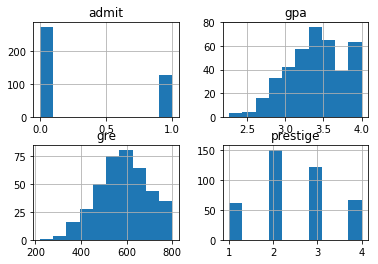

In [32]:
df_raw.hist()

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: There is a greater difference between the mean value and the median value (relatively). The GPA distribution also has a large gap in values between 3.75 and 4 indicating a greater variance and std.

#### Question 4. Drop data points with missing data


In [46]:
df_raw_dropped=df_raw.dropna()
df_raw_dropped

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: One could dropnas and compare the value count using .describe() or .info() to see the difference between the droppedna data set and the original

#### Question 6. Create box plots for GRE and GPA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115643550>]], dtype=object)

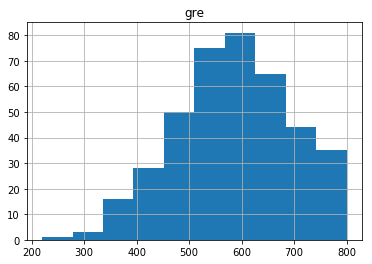

In [34]:
#boxplot 1
df_raw.hist('gre')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115798250>]], dtype=object)

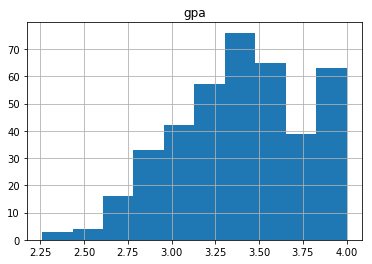

In [35]:
#boxplot 2 
df_raw.hist('gpa')

#### Question 7. What do this plots show?

Answer: This plots show the frequency/count of data points within each grouped data range.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115890950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115b84b10>]], dtype=object)

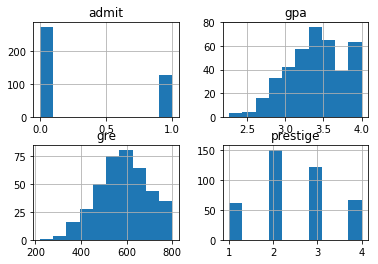

In [36]:
# plot the distribution of each variable 
df_raw.hist()
#Admit has a binary distribution and is positive skewed
#GPA is negatively skewed as the median is greater than the mean value
#GRE is positively skewed as the median is less than the mean
#Prestige is positively skewed

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [37]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [38]:
df_raw.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [39]:
df_raw.kurt()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

In [40]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [47]:
stats.normaltest(df_raw_dropped.admit)

NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)

In [48]:
stats.normaltest(df_raw_dropped.gre)

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [49]:
stats.normaltest(df_raw_dropped.gpa)

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

In [50]:
stats.normaltest(df_raw_dropped.prestige)

NormaltestResult(statistic=49.421253219400995, pvalue=1.8548603556153736e-11)

Answer: The skewness of some of the series is close to 0 and they are normally distributed. But some of the series are not close to 0 and we cannot therefore say that the dataset as a whole is normally distributed. Given that the pvalue of GPA is statistically significant, we cannot say that this data set is normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Distribution needs correction in order to use any model that relies on a normal distribution. One could correct by trimming outliers or doing a log transformation of the data set. This would be particularly useful on the distribution of GPA since it was not normally distributed.

#### Question 11. Which of our variables are potentially colinear? 

In [35]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: None of the variables are very correlated with each other. Prestige is negative correlated with admittance. GRE and GPA are the most positively correlated of any variables (0.38), which is not surprising. Surprisingly, there is almost no correlation between GPA and prestige.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First I would test for the distribution of the prestige series. Then I would test the correlated as done in question 12 -- it seems that prestige has a negative impact on admittance. Then, I would test for how normal the prestige data set is distributed and normalize where possible. Next, I would dummify the prestige value before running a regression. Another step before modelling would be visualize using a violin plot (below) to see if there are any important groupings one can identify visually. Lastly, I would try to model this relationship using a logistic or linear regression.

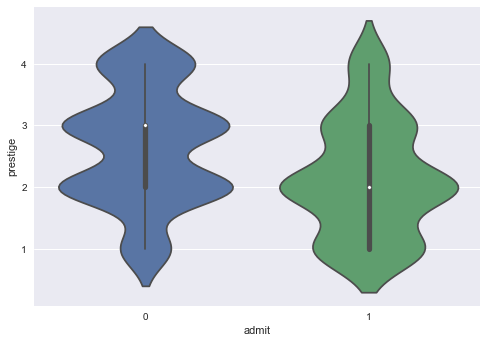

In [57]:
import seaborn as sns
sns.violinplot(x="admit", y="prestige", data=df_raw, jitter=True)

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that one's chances of being admitted increase for each level of prestige (or that one's chances of being admitted decrease for every step down in prestige). I would also expect that prestige is a statistically significant predictor in estimating one's chance of being admitted.

In [65]:
print df_prestige.head()

   prestige_1.0  prestige_2.0  prestige_3.0
0             0             0             1
1             0             0             1
2             1             0             0
3             0             0             0
4             0             0             0


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

One could fill in the missing observations: using mean values, the value before or after the missing value, or interpolating (modelling a potential value to fill with).

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data